# DeepGaze III Client

Notes:
- DeepGaze III trained on images of max size of 1024 on longer dimension
- Fixation inputs are pixel coordinates

In [1]:
import numpy as np
from PIL import Image
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import orjson

## Conditional log density

In [2]:
url = "http://localhost:4000/conditional_log_density"
img_path1 = "data/beer_ad.jpg"
img_path2 = "data/beer_ad.jpg"

json_data = orjson.dumps({
    "x_hist": [[100, 100, 100, 100], [200, 200]],
    "y_hist": [[100, 100, 100, 100], [200, 200]]
})

# img_file = open(img_path, "rb")
request_params = {
    "url": url,
    "data": {
        "json_data": json_data
    },
    "files": [
        ("stimulus", open(img_path1, "rb")),
        ("stimulus", open(img_path2, "rb"))
    ]
}

response = requests.post(**request_params)
for f in request_params["files"]:
    f[1].close()

log_density = orjson.loads(response.content)["log_density"]
prob = np.exp(log_density)

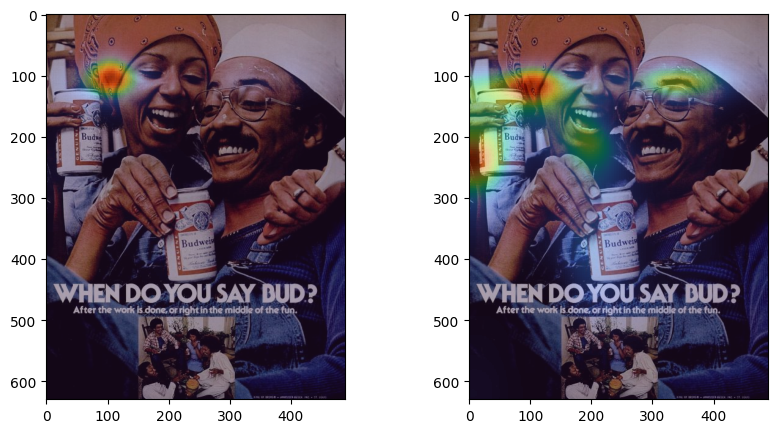

In [3]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
img = Image.open("data/beer_ad.jpg")
plt.imshow(img)
plt.imshow(prob[0, 0], cmap="turbo", alpha=0.4)

plt.subplot(1, 2, 2)
plt.imshow(img)
plt.imshow(prob[1, 0], cmap="turbo", alpha=0.4)
plt.show()

## Scanpath Generation

In [4]:
request_params = {
    "url": "http://localhost:4000/sample_fixations",
    "data": {
        "size": 2,
        "n": 8,
        "temperature": 0.5
    },
    "files": [("stimulus", open("data/beer_ad.jpg", "rb"))]
}

response = requests.post(**request_params)
for f in request_params["files"]:
    f[1].close()

fixations = orjson.loads(response.content)

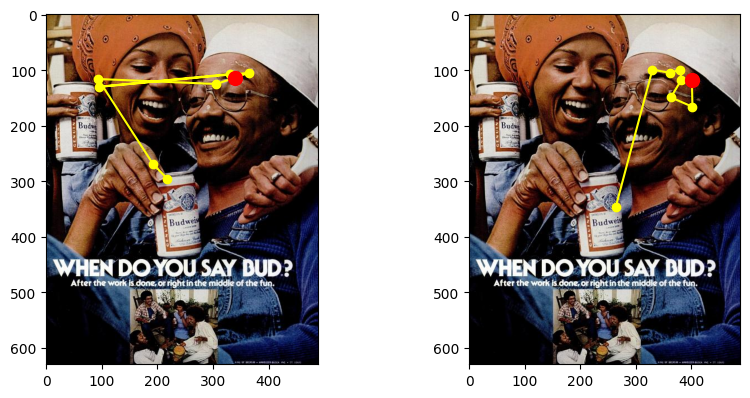

In [5]:
size = request_params["data"]["size"]
dim = int(np.ceil(np.sqrt(size)))
plt.figure(figsize=(dim * 5, dim * 5))

for i in range(size):
    plt.subplot(dim, dim, i + 1)
    img = Image.open("data/beer_ad.jpg")
    x_fixations = fixations["x_fixations"][i]
    y_fixations = fixations["y_fixations"][i]
    plt.imshow(img)
    plt.plot(x_fixations, y_fixations, "o-", color="yellow", zorder=1)
    plt.scatter(x_fixations[-1], y_fixations[-1], color="red", s=100, zorder=2)

plt.show()